In [1]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import prophet
from prophet import Prophet 

C:\Users\DELL LATITUDE E5270\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("./goldstock.csv", skipinitialspace= True)
df.head()

,Date,Close,Volume,Open,High,Low
0,1/19/2024,2029.3,166078,2027.4,2041.9,2022.2
1,1/18/2024,2021.6,167013,2009.1,2025.6,2007.7
2,1/17/2024,2006.5,245194,2031.7,2036.1,2004.6
3,1/16/2024,2030.2,277995,2053.4,2062.8,2027.6
4,1/12/2024,2051.6,250946,2033.2,2067.3,2033.1


In [4]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946,2033.2,2067.3,2033.1


In [5]:
df.dropna(inplace= True)
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946,2033.2,2067.3,2033.1


In [6]:
df.drop_duplicates(inplace = True)
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946,2033.2,2067.3,2033.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2493 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2493 non-null   datetime64[ns]
 1   Close   2493 non-null   float64       
 2   Volume  2493 non-null   int64         
 3   Open    2493 non-null   float64       
 4   High    2493 non-null   float64       
 5   Low     2493 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 136.3 KB


In [8]:
df.sort_values(by= "Date", ascending = True, inplace = True)
df.head() 

,Date,Close,Volume,Open,High,Low
2510,2014-01-22,1238.6,80262,1240.5,1243.5,1235.5
2509,2014-01-23,1262.5,41697,1235.1,1267.1,1230.8
2508,2014-01-24,1264.5,34998,1264.3,1273.2,1256.9
2507,2014-01-27,1263.5,63419,1269.9,1280.1,1252.0
2506,2014-01-28,1250.5,81426,1254.9,1261.9,1248.0


In [9]:
df.to_csv("./gold.csv") 

In [10]:
df1 = df[["Date", "Volume"]]
df1.head()

,Date,Volume
2510,2014-01-22,80262
2509,2014-01-23,41697
2508,2014-01-24,34998
2507,2014-01-27,63419
2506,2014-01-28,81426


In [11]:
# changing column names
df1.columns = ["ds", "y"]
df1.head()

,ds,y
2510,2014-01-22,80262
2509,2014-01-23,41697
2508,2014-01-24,34998
2507,2014-01-27,63419
2506,2014-01-28,81426


In [12]:
a = df1["ds"].min() 
b = df1["ds"].max()

print(a)
print(b)

2014-01-22 00:00:00
2024-01-19 00:00:00


<Axes: xlabel='ds'>

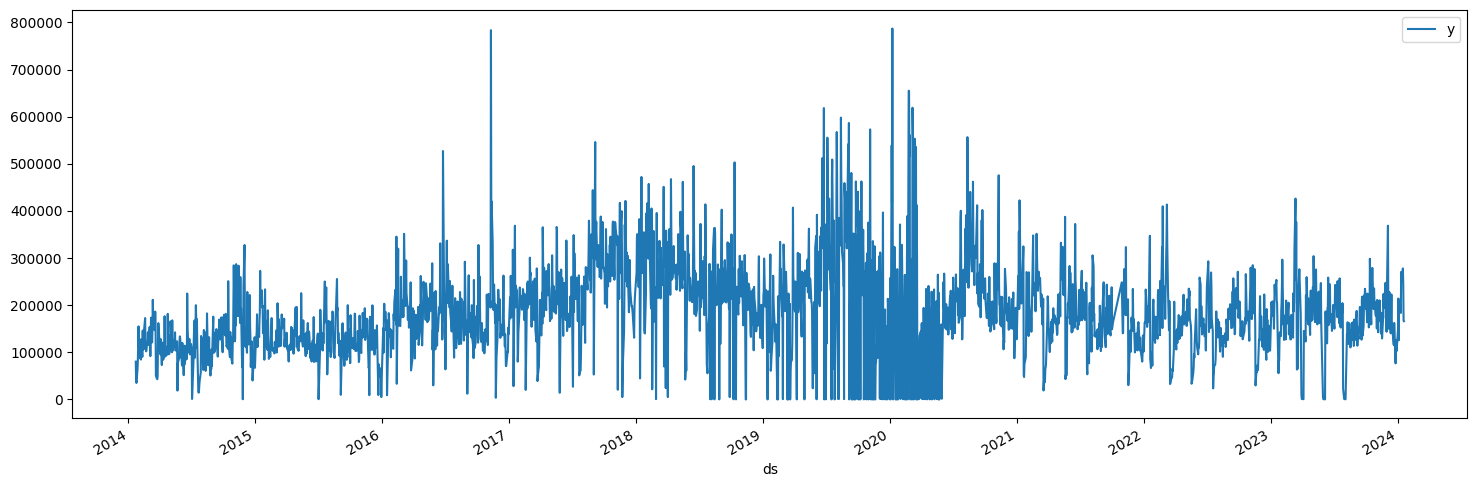

In [13]:
df1.plot(x = "ds", y = "y", figsize = (18, 6))

In [14]:
# Define the training date range
start_date = '2014-01-01'
end_date = '2023-12-31'
start_date1 = '2024-01-01'
end_date1 = '2024-01-20'

# Filter the DataFrame to select only the training and testing data
train = df1[(df1['ds'] >= start_date) & (df1['ds'] <= end_date)]
test = df1[(df1['ds'] >= start_date1) & (df1['ds'] <= end_date1)]

In [15]:
df1.shape

(2493, 2)

In [16]:
train.shape

(2480, 2)

In [17]:
test.shape

(13, 2)

In [18]:
# this code sets up and trains a Prophet model (m) on historical time series data (train), 
# generates a DataFrame (future) for future timestamps, 
# and then uses the trained model to make forecasts for those future timestamps
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 365) #MS - Monthly, H - Hourly
forecast = m.predict(future) 

17:30:07 - cmdstanpy - INFO - Chain [1] start processing
17:30:08 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-22,98155.726079,10344.522063,223934.969106,98155.726079,98155.726079,16006.692359,16006.692359,16006.692359,10892.251200,10892.251200,10892.251200,5114.441159,5114.441159,5114.441159,0.0,0.0,0.0,114162.418438
1,2014-01-23,98230.950001,15735.906540,227672.817856,98230.950001,98230.950001,19281.373306,19281.373306,19281.373306,17110.326811,17110.326811,17110.326811,2171.046495,2171.046495,2171.046495,0.0,0.0,0.0,117512.323307
2,2014-01-24,98306.173923,-12040.438411,199180.114026,98306.173923,98306.173923,-3233.459209,-3233.459209,-3233.459209,-2281.760716,-2281.760716,-2281.760716,-951.698493,-951.698493,-951.698493,0.0,0.0,0.0,95072.714714
3,2014-01-27,98531.845690,-35992.174674,185332.999704,98531.845690,98531.845690,-24132.078460,-24132.078460,-24132.078460,-13521.256260,-13521.256260,-13521.256260,-10610.822200,-10610.822200,-10610.822200,0.0,0.0,0.0,74399.767230
4,2014-01-28,98607.069612,-21883.177244,202658.781362,98607.069612,98607.069612,-7853.561019,-7853.561019,-7853.561019,5807.107664,5807.107664,5807.107664,-13660.668683,-13660.668683,-13660.668683,0.0,0.0,0.0,90753.508593


In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2840,2024-12-24,142930.518356,-7796.303445,221267.504909,138841.002009,147883.565516,-36155.949598,-36155.949598,-36155.949598,5807.107664,5807.107664,5807.107664,-41963.057262,-41963.057262,-41963.057262,0.0,0.0,0.0,106774.568758
2841,2024-12-25,142902.388878,2839.875029,222254.985398,138794.046909,147874.562710,-30082.642072,-30082.642072,-30082.642072,10892.251200,10892.251200,10892.251200,-40974.893273,-40974.893273,-40974.893273,0.0,0.0,0.0,112819.746806
2842,2024-12-26,142874.259401,5319.634095,228736.176415,138747.091808,147876.173912,-22451.161753,-22451.161753,-22451.161753,17110.326811,17110.326811,17110.326811,-39561.488563,-39561.488563,-39561.488563,0.0,0.0,0.0,120423.097648
2843,2024-12-27,142846.129923,-5648.855358,217878.729312,138700.136708,147878.169460,-40010.243286,-40010.243286,-40010.243286,-2281.760716,-2281.760716,-2281.760716,-37728.482569,-37728.482569,-37728.482569,0.0,0.0,0.0,102835.886638
2844,2024-12-28,142818.000446,-16447.888338,208369.814615,138653.181608,147880.165008,-44494.688852,-44494.688852,-44494.688852,-9003.342580,-9003.342580,-9003.342580,-35491.346272,-35491.346272,-35491.346272,0.0,0.0,0.0,98323.311594


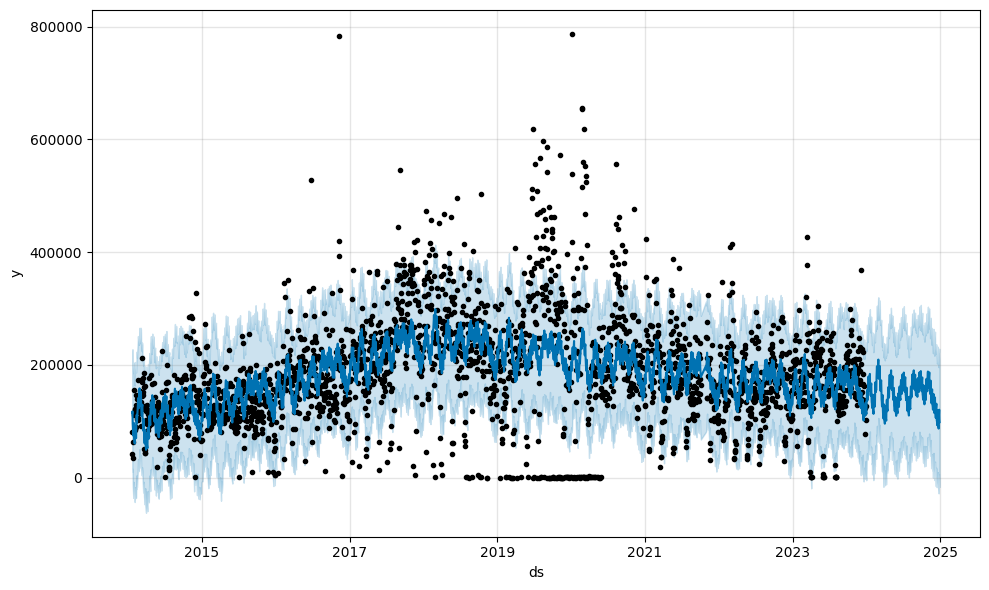

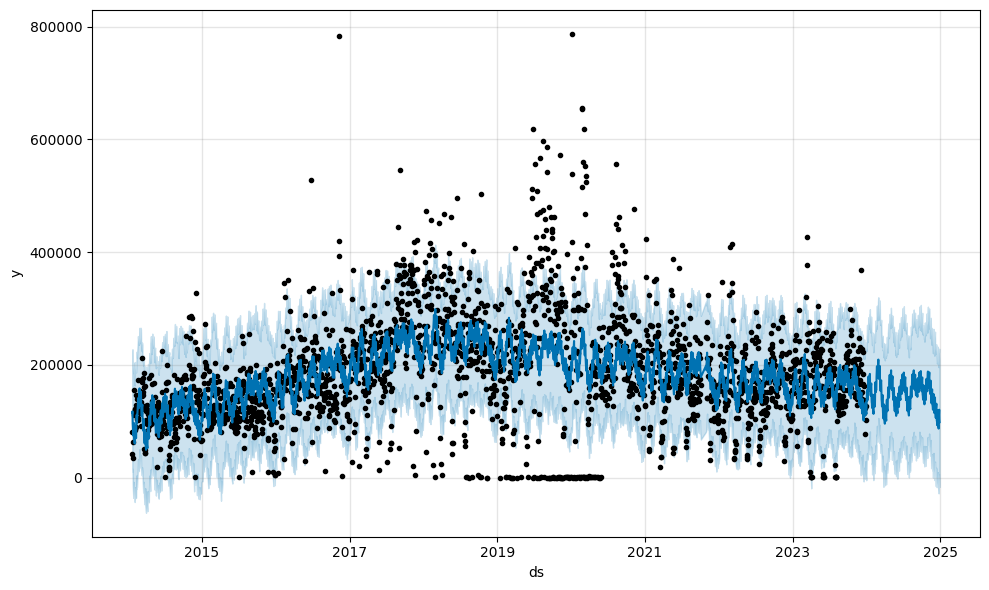

In [21]:
# plotting the forecasted data
m.plot(forecast)

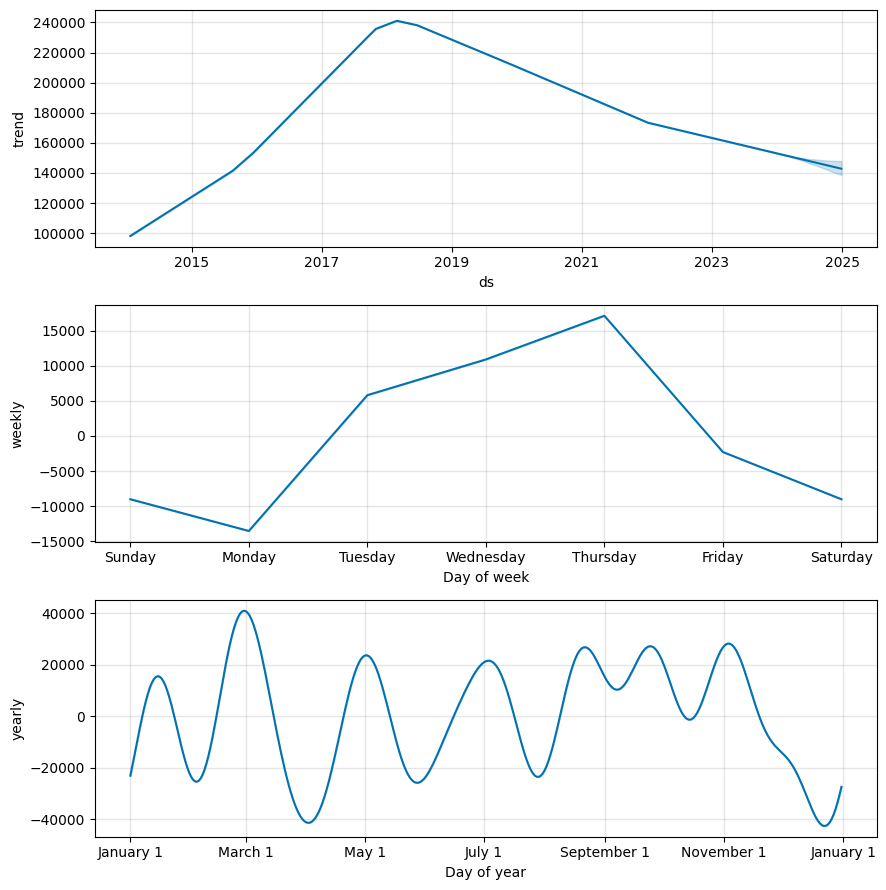

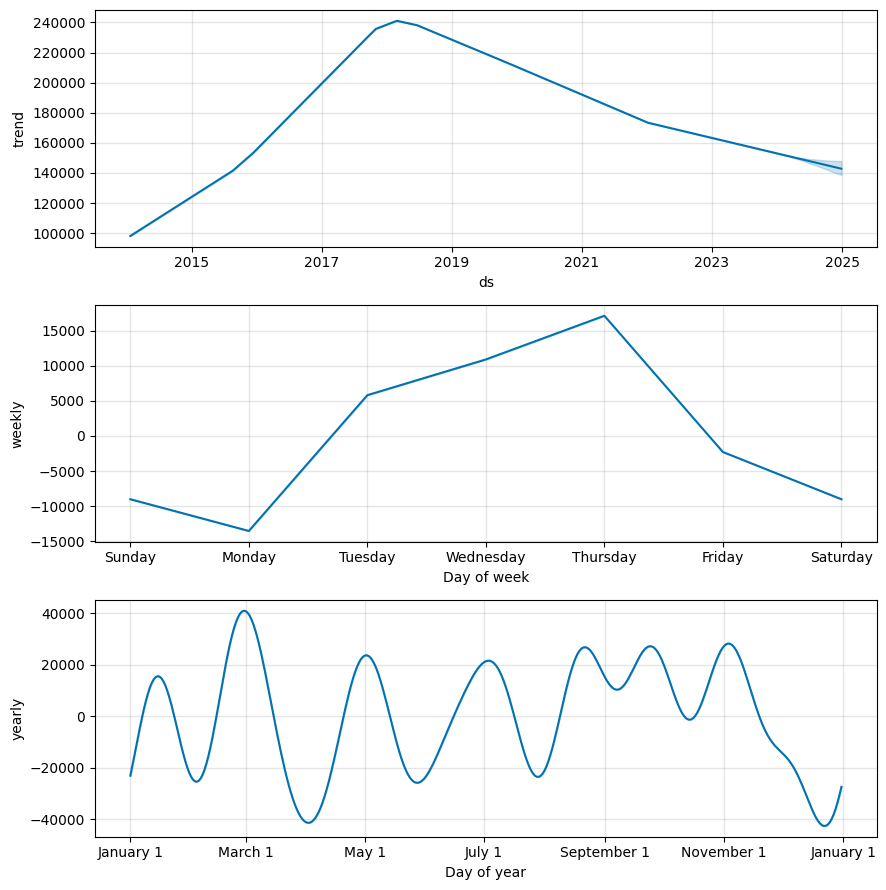

In [22]:
# this code is used to create a set of visualizations that display the individual components of the time series forecast
m.plot_components(forecast)

In [23]:
# performs cross-validation using the Prophet library for time series forecasting
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = "90 days")
df_cv 

  0%|          | 0/71 [00:00<?, ?it/s]17:31:53 - cmdstanpy - INFO - Chain [1] start processing
17:31:54 - cmdstanpy - INFO - Chain [1] done processing
  1%|▏         | 1/71 [00:00<00:36,  1.91it/s]17:31:54 - cmdstanpy - INFO - Chain [1] start processing
17:31:54 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 2/71 [00:00<00:33,  2.05it/s]17:31:54 - cmdstanpy - INFO - Chain [1] start processing
17:31:54 - cmdstanpy - INFO - Chain [1] done processing
  4%|▍         | 3/71 [00:01<00:31,  2.15it/s]17:31:55 - cmdstanpy - INFO - Chain [1] start processing
17:31:55 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 4/71 [00:01<00:29,  2.28it/s]17:31:55 - cmdstanpy - INFO - Chain [1] start processing
17:31:55 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 5/71 [00:02<00:28,  2.28it/s]17:31:56 - cmdstanpy - INFO - Chain [1] start processing
17:31:56 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 6/71 [00:02<00:31,  2.04it/s]17:31:56

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-17,142670.055347,90553.594114,196373.977775,172721,2015-02-14
1,2015-02-18,142303.340650,87200.177200,198962.209997,114178,2015-02-14
2,2015-02-19,156056.822037,100382.748664,209492.489768,105113,2015-02-14
3,2015-02-20,157509.640866,103628.403736,212258.709154,103062,2015-02-14
4,2015-02-23,145034.846475,95191.567047,197526.971967,108517,2015-02-14
...,...,...,...,...,...,...
4355,2023-12-22,93005.119634,-14323.996228,196001.759634,162292,2023-09-30
4356,2023-12-26,104882.048888,-14557.525967,216171.625915,76492,2023-09-30
4357,2023-12-27,111595.445592,3121.486335,225020.886876,124021,2023-09-30
4358,2023-12-28,119960.069084,17161.434836,240436.049620,126411,2023-09-30


In [24]:
# compute performance metrics based on the results of cross-validation
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p 

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,9.098180e+09,95384.378341,64335.857007,1917.669336,0.226875,0.366231,0.777084
1,11 days,8.775222e+09,93676.154232,63644.724092,1515.967268,0.230360,0.362171,0.780963
2,12 days,9.384030e+09,96871.202774,65834.567000,1353.603286,0.236264,0.366675,0.769178
3,13 days,9.109853e+09,95445.549753,66688.425907,914.910060,0.238794,0.374337,0.758840
4,14 days,9.187103e+09,95849.378874,67763.757609,1143.479699,0.242790,0.385043,0.753440
...,...,...,...,...,...,...,...,...
76,86 days,1.012183e+10,100607.304634,71174.222501,266.648185,0.270745,0.386555,0.686478
77,87 days,1.013897e+10,100692.468854,70572.775155,260.578793,0.263668,0.382606,0.691743
78,88 days,9.215035e+09,95994.972539,69049.030124,186.629792,0.265396,0.381623,0.691221
79,89 days,9.669174e+09,98331.957435,70474.043586,115.700382,0.274288,0.391842,0.689602


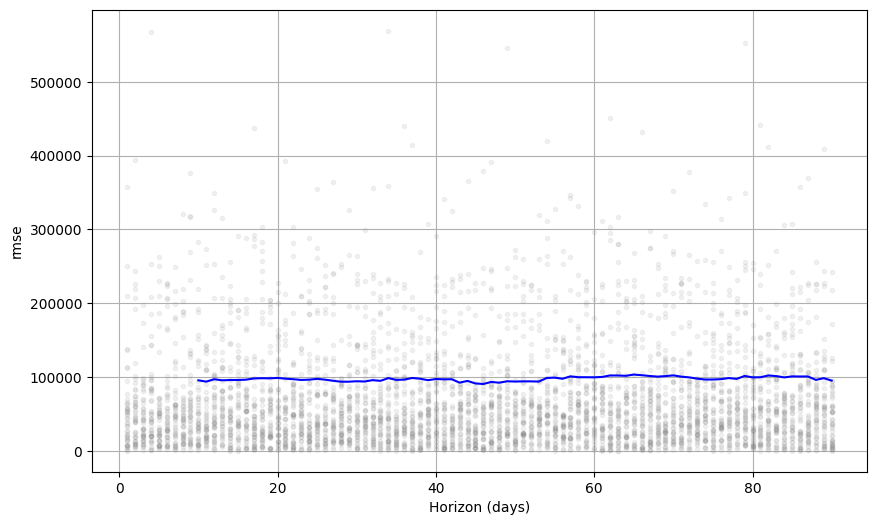

In [25]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Root Mean Squared Error (RMSE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "rmse")

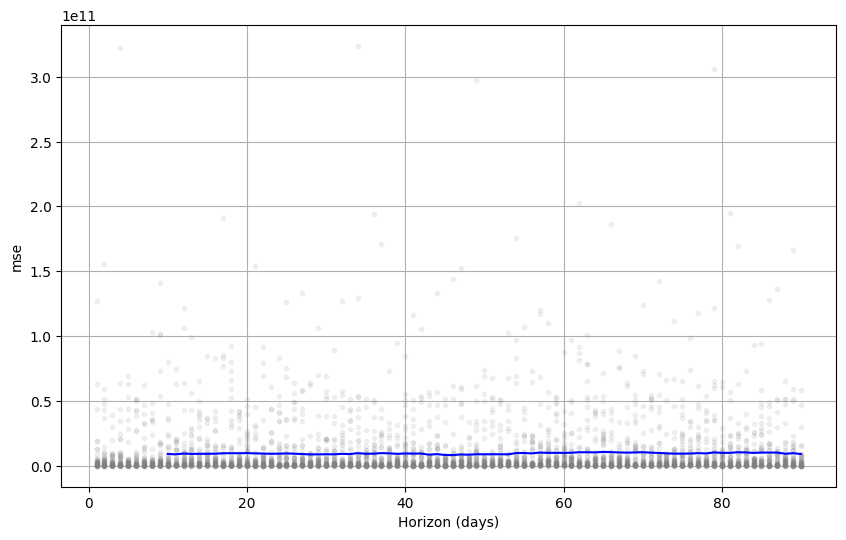

In [26]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Mean Squared Error (MSE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "mse")

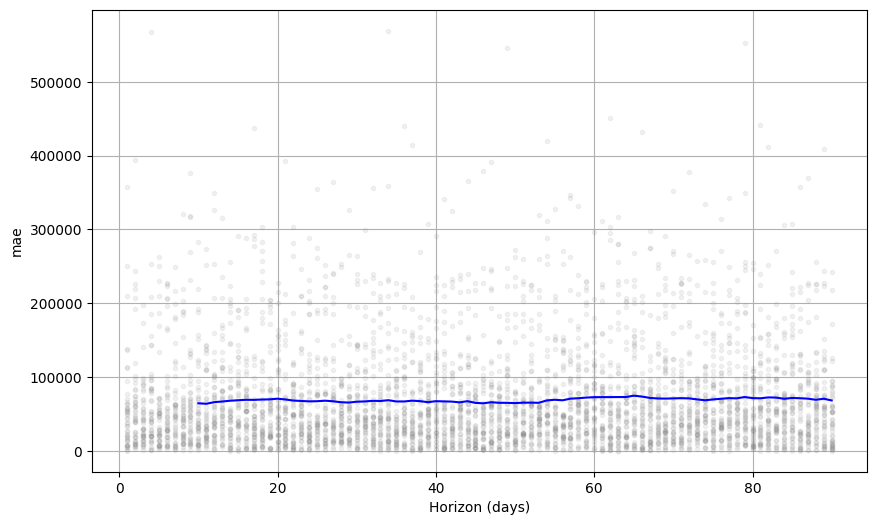

In [27]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Mean Absolute Error (MAE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "mae")